In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [222]:
dataset=pd.read_csv('../dirty_dataset.csv')
dataset.shape

(55, 9)

In [223]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       55 non-null     object 
 1   Name              55 non-null     object 
 2   Email             47 non-null     object 
 3   Purchase_Amount   42 non-null     float64
 4   Purchase_Date     48 non-null     object 
 5   Product_Category  55 non-null     object 
 6   Quantity          45 non-null     object 
 7   Discount_Applied  44 non-null     object 
 8   Store_Location    55 non-null     object 
dtypes: float64(1), object(8)
memory usage: 4.0+ KB


In [224]:
dataset.isnull().sum()

Customer_ID          0
Name                 0
Email                8
Purchase_Amount     13
Purchase_Date        7
Product_Category     0
Quantity            10
Discount_Applied    11
Store_Location       0
dtype: int64

In [225]:
dataset.head(5)

,Customer_ID,Name,Email,Purchase_Amount,Purchase_Date,Product_Category,Quantity,Discount_Applied,Store_Location
0,c001,John Doe,john.doe@email.com,2000.0,2024-01-01,Electronics,NaN,no,New York
1,C001,Jane Smith,jane.smith@email.com,100.0,01/02/2024,Clothing,2,True,Los Angeles
2,C001,JANE SMITH,jane.smith@EMAIL.com,-10.0,2024-01-03,clothing,two,no,los angeles
3,c001,Mike Brown,mikebrown@email.com,NaN,2024-01-04,Furniture,two,False,Chicago
4,C003,mike brown,NaN,2000.0,01-05-2024,FURNITURE,two,True,CHICAGO


In [226]:
dataset.describe()

,Purchase_Amount
count,42.000000
mean,525.476190
std,818.851672
min,-10.000000
25%,12.500000
50%,50.000000
75%,1000.000000
max,2000.000000


## Finding the outliers in the 'Quality of Sleep' Column

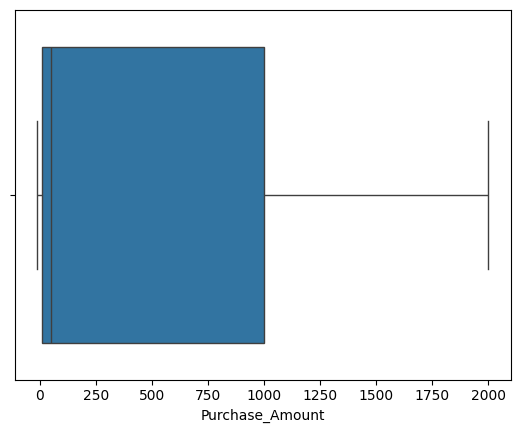

In [227]:
sns.boxplot(x='Purchase_Amount',data=dataset)
plt.show()

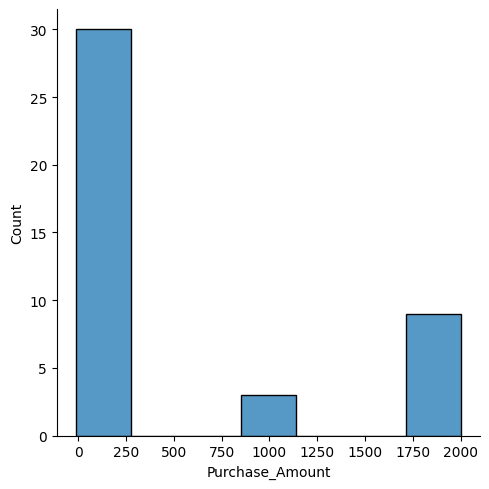

In [228]:
sns.displot(dataset['Purchase_Amount'])
plt.show()

In [229]:
dataset2=pd.read_csv('../covid.csv')
dataset2.shape



(472560, 8)

In [230]:
dataset2.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.092560e+05,4.725600e+05,153448.000000,4.725600e+05
mean,3.717696e+03,2.001990e+06,46.247915,2.139459e+04
std,4.868857e+04,8.405211e+06,242.756418,8.597986e+04
min,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,3.000000e+00,6.265000e+03,0.000000,3.800000e+01
50%,6.100000e+01,5.714900e+04,2.000000,6.810000e+02
75%,6.840000e+02,6.432410e+05,15.000000,7.693000e+03
max,6.966046e+06,1.034368e+08,44047.000000,1.224213e+06


In [231]:
dataset2.isnull().sum()

Date_reported             0
Country_code           1969
Country                   0
WHO_region                0
New_cases            263304
Cumulative_cases          0
New_deaths           319112
Cumulative_deaths         0
dtype: int64

In [232]:
dataset2.drop(columns=['New_deaths','New_cases'],inplace=True)

## Visual Method to Find the Outliers

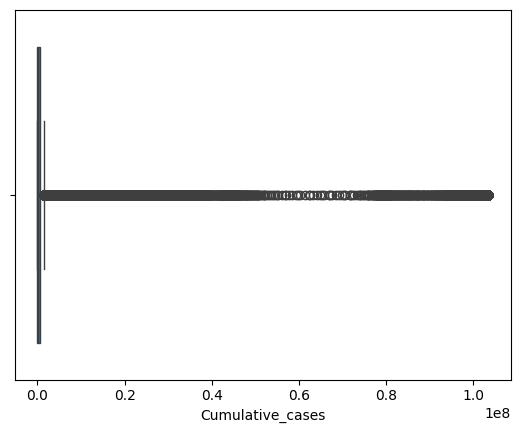

In [233]:
sns.boxplot(x='Cumulative_cases',data=dataset2)
plt.show()

## IQR : Statical method to Find the Outliers

In [234]:
q1=dataset2['Cumulative_cases'].quantile(0.25)
q3=dataset2['Cumulative_cases'].quantile(0.75)
iqr=q3-q1
iqr

np.float64(636976.0)

In [235]:
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)
min_range,max_range


(np.float64(-949199.0), np.float64(1598705.0))

## Removing the Outliers

In [236]:
new_dataset2=dataset2[dataset2['Cumulative_cases']<=max_range]
new_dataset2.shape

(402919, 6)

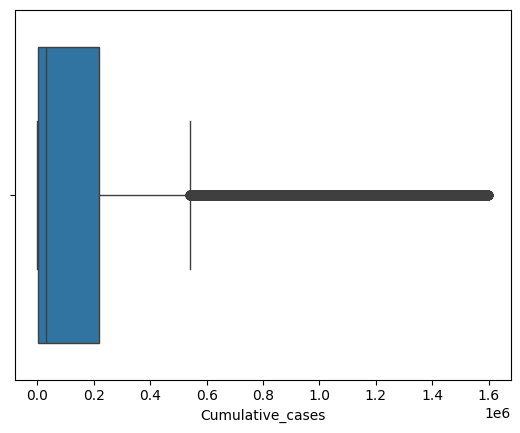

In [237]:
sns.boxplot(x='Cumulative_cases',data=new_dataset2)
plt.show()

## Z - Score method to find the Outliers

In [238]:
z_score=(dataset2['Cumulative_cases']-dataset2['Cumulative_cases'].mean())/(dataset2['Cumulative_cases'].std())
z_score

0        -0.238184
1        -0.238184
2        -0.238184
3        -0.238184
4        -0.238184
            ...   
472555    0.668695
472556   -0.230583
472557   -0.234235
472558   -0.208289
472559   -0.228642
Name: Cumulative_cases, Length: 472560, dtype: float64

In [239]:
dataset2['z_score']=z_score
dataset2.head(5)

,Date_reported,Country_code,Country,WHO_region,Cumulative_cases,Cumulative_deaths,z_score
0,2020-01-04,VC,Saint Vincent and the Grenadines,AMR,0,0,-0.238184
1,2020-01-04,SN,Senegal,AFR,0,0,-0.238184
2,2020-01-04,SB,Solomon Islands,WPR,0,0,-0.238184
3,2020-01-04,LK,Sri Lanka,SEAR,0,0,-0.238184
4,2020-01-04,SY,Syrian Arab Republic,EMR,0,0,-0.238184


In [240]:
new_z_dataset=dataset2[dataset2['z_score']<3]
new_z_dataset.shape

(463458, 7)

In [241]:
min=dataset2['Cumulative_cases'].mean()-(3*dataset2['Cumulative_cases'].std())
max=dataset2['Cumulative_cases'].mean()+(3*dataset2['Cumulative_cases'].std())
min,max

(np.float64(-23213642.388050284), np.float64(27217621.628206033))

In [242]:
direct_newdataset=dataset2[dataset2['Cumulative_cases']<=max_range]
direct_newdataset.shape

(402919, 7)

In [243]:
my_dataset=pd.read_csv('../movies.csv')
my_dataset.shape
my_dataset.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN


In [244]:
(my_dataset.isnull().sum())/(my_dataset.shape[0])*100

MOVIES       0.000000
YEAR         6.440644
GENRE        0.800080
RATING      18.201820
ONE-LINE     0.000000
STARS        0.000000
VOTES       18.201820
RunTime     29.582958
Gross       95.399540
dtype: float64

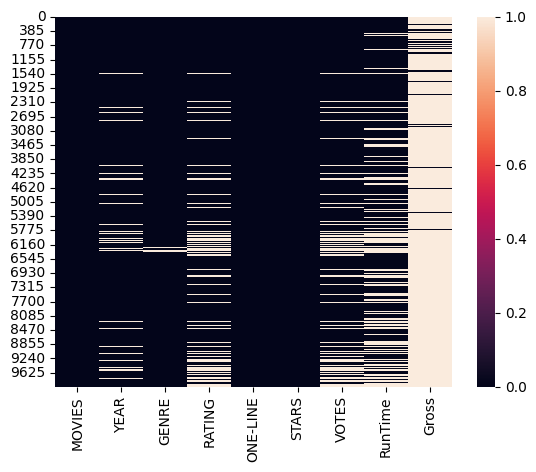

In [245]:
sns.heatmap(my_dataset.isnull())
plt.show()

In [246]:
my_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


<Axes: xlabel='RunTime'>

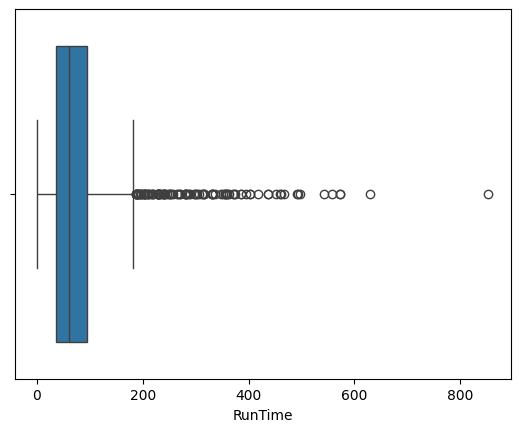

In [247]:
sns.boxplot(x='RunTime',data=my_dataset)

In [248]:
my_dataset.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [249]:
my_dataset['RunTime'].fillna(my_dataset['RunTime'].median())


0       121.0
1        25.0
2        44.0
3        23.0
4        60.0
        ...  
9994     60.0
9995     60.0
9996     60.0
9997     60.0
9998     60.0
Name: RunTime, Length: 9999, dtype: float64

In [250]:
my_dataset.isnull().sum()


MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

<Axes: >

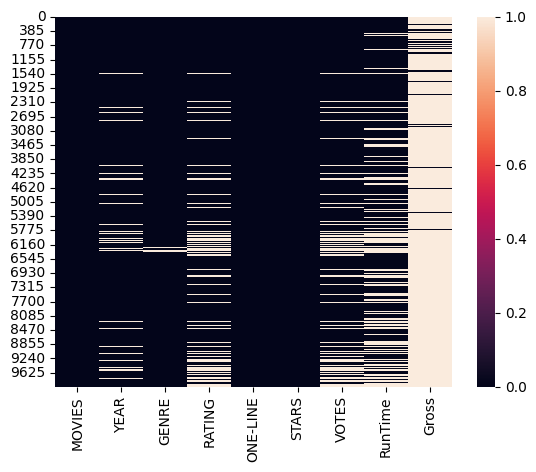

In [251]:
sns.heatmap(my_dataset.isnull())

<Axes: xlabel='VOTES'>

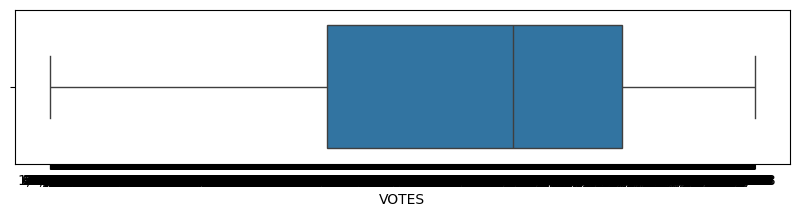

In [252]:
plt.figure(figsize=(10,2))
sns.boxplot(x='VOTES',data=my_dataset)

In [253]:
my_dataset.describe()
my_dataset.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN


In [254]:
my_dataset['VOTES'].fillna(my_dataset['VOTES'].mode()[0],inplace=True)
my_dataset.isnull().sum()

/var/folders/34/3wp7qxj90gb3d60ymvblmvt80000gn/T/ipykernel_30979/1173766931.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  my_dataset['VOTES'].fillna(my_dataset['VOTES'].mode()[0],inplace=True)


MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES          0
RunTime     2958
Gross       9539
dtype: int64

<Axes: >

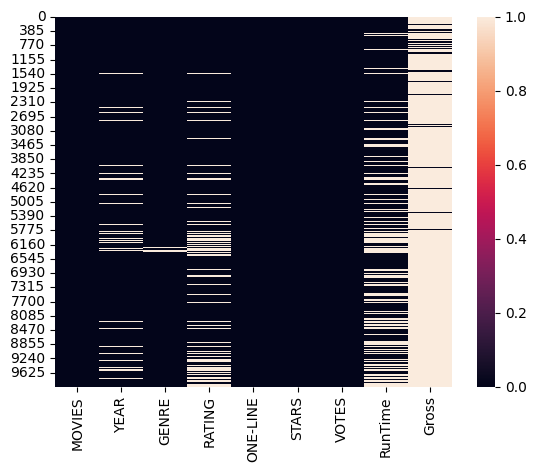

In [255]:
sns.heatmap(my_dataset.isnull())

In [256]:
my_dataset.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


<Axes: xlabel='RATING'>

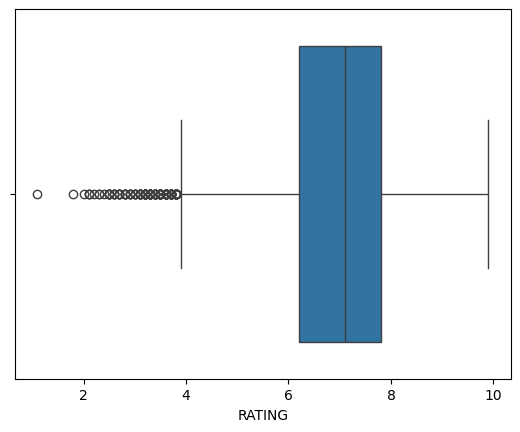

In [257]:
sns.boxplot(x='RATING',data=my_dataset)

In [258]:
my_dataset['RATING'].fillna(my_dataset['RATING'].mean())
my_dataset.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES          0
RunTime     2958
Gross       9539
dtype: int64

<Axes: >

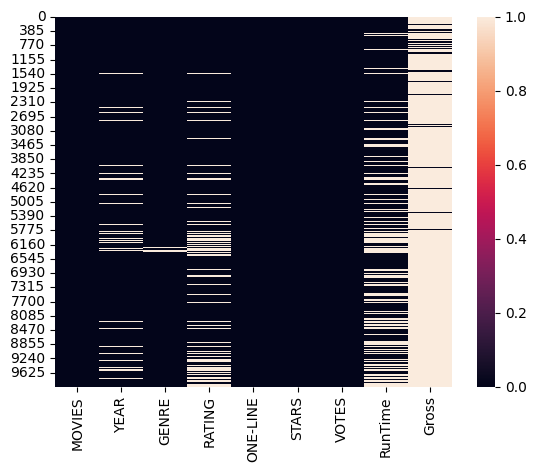

In [259]:
sns.heatmap(my_dataset.isnull())

In [260]:
my_dataset['YEAR'].fillna(my_dataset['YEAR'].mode()[0],inplace=True)


/var/folders/34/3wp7qxj90gb3d60ymvblmvt80000gn/T/ipykernel_30979/1475323351.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  my_dataset['YEAR'].fillna(my_dataset['YEAR'].mode()[0],inplace=True)


In [261]:
my_dataset.isnull().sum().sum()

np.int64(14397)

In [262]:
my_dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9994     True
9995    False
9996    False
9997    False
9998    False
Length: 9999, dtype: bool

In [263]:
my_dataset.duplicated().sum()
my_dataset.drop_duplicates(inplace=True)
my_dataset.duplicated().sum()

np.int64(0)

## Standarization (z-score scaling)

In [264]:
my_dataset.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,7,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN


In [265]:
my_dataset.describe()

,RATING,RunTime
count,8168.000000,7008.000000
mean,6.919699,68.874144
std,1.219970,47.278890
min,1.100000,1.000000
25%,6.200000,37.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


/var/folders/34/3wp7qxj90gb3d60ymvblmvt80000gn/T/ipykernel_30979/4251149630.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(my_dataset['RunTime'])


<Axes: xlabel='RunTime', ylabel='Density'>

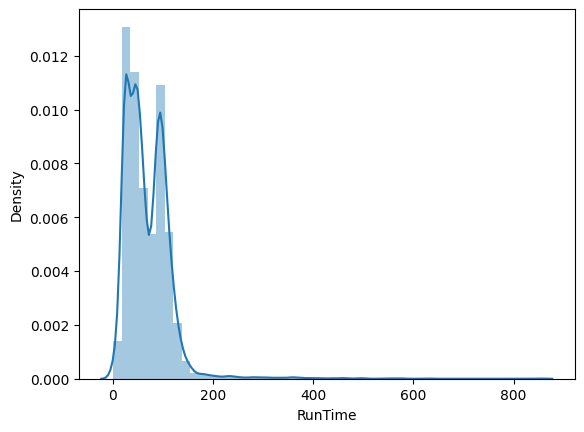

In [266]:
sns.distplot(my_dataset['RunTime'])

In [267]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(my_dataset[["RunTime"]])
scaler.transform(my_dataset[["RunTime"]])
my_dataset['RunTime_Scaler']=scaler.transform(my_dataset[["RunTime"]])
my_dataset.head(5)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,RunTime_Scaler
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,1.102597
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,-0.928052
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,-0.526153
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,-0.970357
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,7,NaN,NaN,NaN


/var/folders/34/3wp7qxj90gb3d60ymvblmvt80000gn/T/ipykernel_30979/3047236438.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(my_dataset['RunTime_Scaler'])


<Axes: xlabel='RunTime_Scaler', ylabel='Density'>

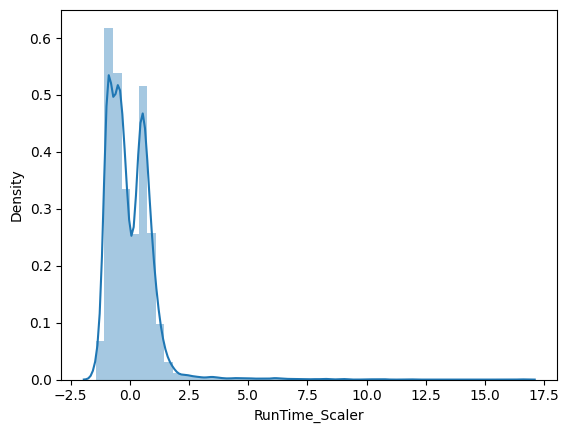

In [268]:
sns.distplot(my_dataset['RunTime_Scaler'])

<Axes: xlabel='RunTime_Scaler'>

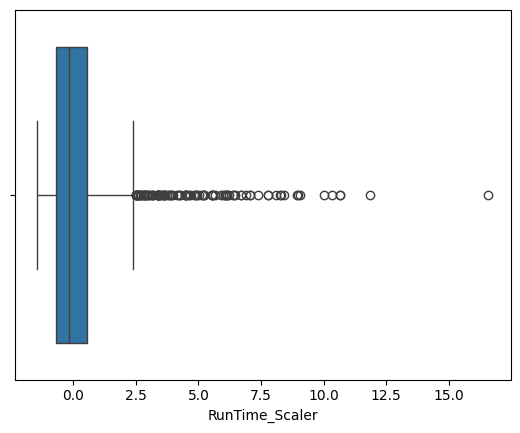

In [269]:
sns.boxplot(x='RunTime_Scaler',data=my_dataset)

In [270]:
q1=my_dataset['RunTime_Scaler'].quantile(0.25)
q3=my_dataset['RunTime_Scaler'].quantile(0.75)
iqr=q3-q1
iqr


np.float64(1.226850690102519)

In [271]:
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)
min_range,max_range

(np.float64(-2.5144969896564158), np.float64(2.39290577075366))

In [272]:
my_dataset=my_dataset[my_dataset['RunTime_Scaler']<=max_range]
my_dataset.shape

(6903, 10)

<Axes: xlabel='RunTime_Scaler'>

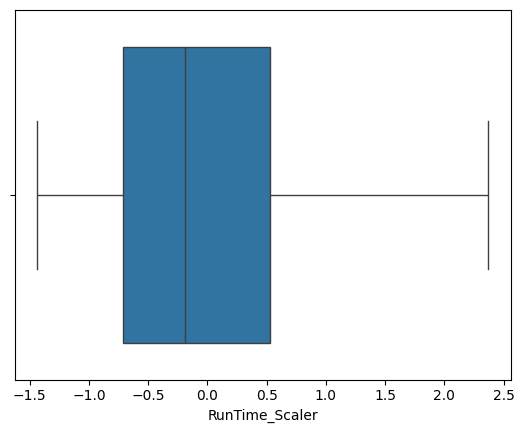

In [273]:
sns.boxplot(x='RunTime_Scaler',data=my_dataset)

/var/folders/34/3wp7qxj90gb3d60ymvblmvt80000gn/T/ipykernel_30979/3047236438.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(my_dataset['RunTime_Scaler'])


<Axes: xlabel='RunTime_Scaler', ylabel='Density'>

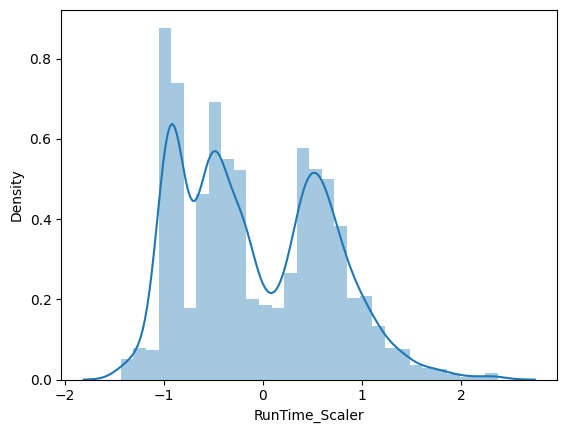

In [274]:
sns.distplot(my_dataset['RunTime_Scaler'])

In [275]:
my_dataset.head(5)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,RunTime_Scaler
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,1.102597
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,-0.928052
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,-0.526153
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,-0.970357
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN,-0.399237


In [276]:
# import numpy as np
# from sklearn.preprocessing import FunctionTransformer

# log_trans=FunctionTransformer(func=np.log1p)
# log_trans.fit(my_dataset[['RunTime_Scaler']])
# log_trans.transform(my_dataset[['RunTime_Scaler']])
# my_dataset['RunTime_Scaler']=log_trans.transform(my_dataset[['RunTime_Scaler']])
# my_dataset.head(5)



In [278]:
my_dataset.isnull().sum()

MOVIES               0
YEAR                 0
GENRE                9
RATING             222
ONE-LINE             0
STARS                0
VOTES                0
RunTime              0
Gross             6448
RunTime_Scaler       0
dtype: int64

In [279]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

log_trans=FunctionTransformer(func=np.log1p)
log_trans.fit(my_dataset[['RunTime_Scaler']])
log_trans.transform(my_dataset[['RunTime_Scaler']])
my_dataset['log_runtime']=log_trans.transform(my_dataset[['RunTime_Scaler']])
my_dataset.head(5)

/Users/nishantthapa/Documents/Data Cleaning/ipynb/myPractice/env/lib/python3.13/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
/Users/nishantthapa/Documents/Data Cleaning/ipynb/myPractice/env/lib/python3.13/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,RunTime_Scaler,log_runtime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,1.102597,0.743173
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,-0.928052,-2.631813
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,-0.526153,-0.746870
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,-0.970357,-3.518540
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN,-0.399237,-0.509555


/var/folders/34/3wp7qxj90gb3d60ymvblmvt80000gn/T/ipykernel_30979/3047236438.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(my_dataset['RunTime_Scaler'])


<Axes: xlabel='RunTime_Scaler', ylabel='Density'>

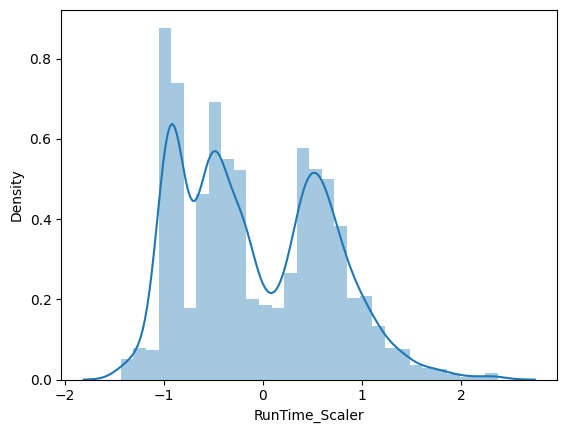

In [283]:
sns.distplot(my_dataset['RunTime_Scaler'])

In [285]:
squ_trans= FunctionTransformer(lambda x: x**2)
log_trans.fit(my_dataset[['RunTime_Scaler']])
log_trans.transform(my_dataset[['RunTime_Scaler']])
my_dataset['sq_runtime']=log_trans.transform(my_dataset[['RunTime_Scaler']])
my_dataset.head(5)

/Users/nishantthapa/Documents/Data Cleaning/ipynb/myPractice/env/lib/python3.13/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
/Users/nishantthapa/Documents/Data Cleaning/ipynb/myPractice/env/lib/python3.13/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,RunTime_Scaler,log_runtime,sq_runtime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,1.102597,0.743173,0.743173
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,-0.928052,-2.631813,-2.631813
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,-0.526153,-0.746870,-0.746870
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,-0.970357,-3.518540,-3.518540
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN,-0.399237,-0.509555,-0.509555


/var/folders/34/3wp7qxj90gb3d60ymvblmvt80000gn/T/ipykernel_30979/3123919341.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(my_dataset['sq_runtime'])


<Axes: xlabel='sq_runtime', ylabel='Density'>

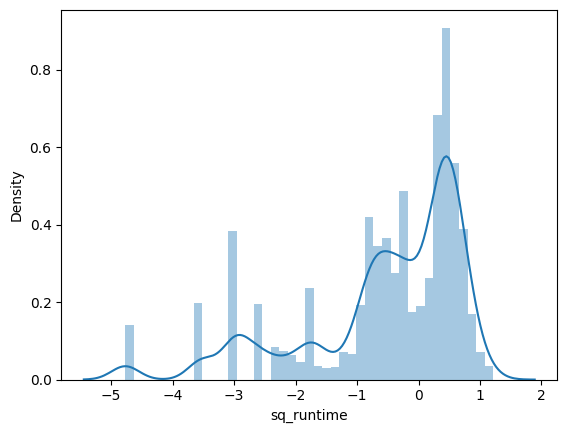

In [286]:
sns.distplot(my_dataset['sq_runtime'])